In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random
import math
import scipy.stats as stats
import scipy.io 
import scipy.integrate as integrate
from numba import jit, int32
import numba
import time
from matplotlib import cm

In [2]:
LO = 6/5
LA = 8/3

NO = 50


xO = np.linspace(0,LO,NO)
dxO = xO[1] - xO[0]

W1 = 10

W2 = 50

W3 = 100 

W4 = 300

t_f = 3*9.6
t_N = 960


t = np.linspace(0,t_f,t_N)
dt = t[1] - t[0]

In [3]:
eta = 1.5 + (0.5*np.tanh(7.5*(xO - LO/2)))
sp_x = np.exp(-45*(xO - LO/4)**2)

In [4]:
T_MC = scipy.io.loadmat('Coupled_Linear_MC.mat')
KO_MC = scipy.io.loadmat('Coupled_Linear_MC.mat')
T_MC = T_MC['Temperature']
KO_MC = KO_MC['Kelvin_Ocean']

In [5]:
T_MC_mean_10 = np.zeros((t_N,NO))
KO_MC_mean_10 = np.zeros((t_N,NO))
T_MC_mean_50 = np.zeros((t_N,NO))
KO_MC_mean_50 = np.zeros((t_N,NO))
T_MC_mean_100 = np.zeros((t_N,NO))
KO_MC_mean_100 = np.zeros((t_N,NO))
T_MC_mean_300 = np.zeros((t_N,NO))
KO_MC_mean_300 = np.zeros((t_N,NO))

In [6]:
T_MC_var_10 = np.zeros((t_N,NO))
KO_MC_var_10 = np.zeros((t_N,NO))
T_MC_var_50 = np.zeros((t_N,NO))
KO_MC_var_50 = np.zeros((t_N,NO))
T_MC_var_100 = np.zeros((t_N,NO))
KO_MC_var_100 = np.zeros((t_N,NO))
T_MC_var_300 = np.zeros((t_N,NO))
KO_MC_var_300 = np.zeros((t_N,NO))

In [7]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W1):
            T_MC_mean_10[i,j] += T_MC[k,i,j]/W1

In [8]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W2):
            T_MC_mean_50[i,j] += T_MC[k,i,j]/W2

In [9]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W3):
            T_MC_mean_100[i,j] += T_MC[k,i,j]/W3

In [10]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W4):
            T_MC_mean_300[i,j] += T_MC[k,i,j]/W4

In [11]:
T_WCE = scipy.io.loadmat('Coupled_Linear_Propagators.mat')
T_WCE = T_WCE['Temperature']
T_WCE_var = scipy.io.loadmat('Coupled_Linear_Variance.mat')
T_WCE_var = T_WCE_var['T_variance']

In [12]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W1):
            T_MC_var_10[i,j] += ((T_WCE[0,i,j] - T_MC[k,i,j])**2)/W1   

In [13]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W2):
            T_MC_var_50[i,j] += ((T_WCE[0,i,j] - T_MC[k,i,j])**2)/W2     

In [14]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W3):
            T_MC_var_100[i,j] += ((T_WCE[0,i,j] - T_MC[k,i,j])**2)/W3     

In [15]:
for i in range(0,t_N):
    for j in range(0,NO):
        for k in range(0,W4):
            T_MC_var_300[i,j] += ((T_WCE[0,i,j] - T_MC[k,i,j])**2)/W4    

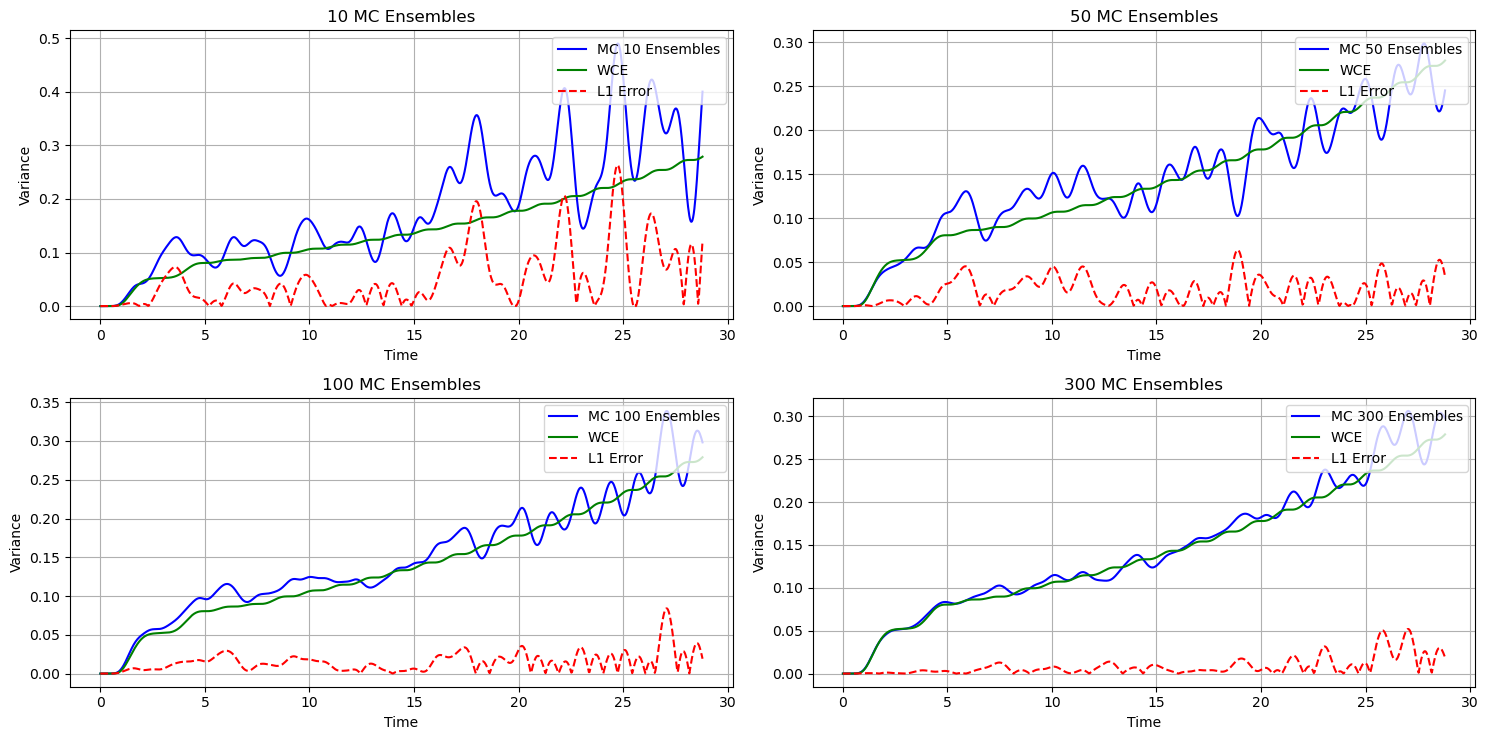

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(15, 7.5))

# Subplot 1
ax[0, 0].plot(t, T_MC_var_10[:,25], color='blue', label='MC 10 Ensembles')
ax[0, 0].plot(t, T_WCE_var[:,25], color='green', label='WCE')
ax[0, 0].plot(t, np.abs(T_WCE_var[:,25] - T_MC_var_10[:,25]), color='red', linestyle='--', label='L1 Error')
ax[0, 0].set_title('10 MC Ensembles')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Variance')
ax[0, 0].legend(loc='upper right')
ax[0, 0].grid(True)

# Subplot 2
ax[0, 1].plot(t, T_MC_var_50[:,25], color='blue', label='MC 50 Ensembles')
ax[0, 1].plot(t, T_WCE_var[:,25], color='green', label='WCE')
ax[0, 1].plot(t, np.abs(T_WCE_var[:,25] - T_MC_var_50[:,25]), color='red', linestyle='--', label='L1 Error')
ax[0, 1].set_title('50 MC Ensembles')
ax[0, 1].set_xlabel('Time')
ax[0, 1].set_ylabel('Variance')
ax[0, 1].legend(loc='upper right')
ax[0, 1].grid(True)

# Subplot 3
ax[1, 0].plot(t, T_MC_var_100[:,25], color='blue', label='MC 100 Ensembles')
ax[1, 0].plot(t, T_WCE_var[:,25], color='green', label='WCE')
ax[1, 0].plot(t, np.abs(T_WCE_var[:,25] - T_MC_var_100[:,25]), color='red', linestyle='--', label='L1 Error')
ax[1, 0].set_title('100 MC Ensembles')
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Variance')
ax[1, 0].legend(loc='upper right')
ax[1, 0].grid(True)

# Subplot 4
ax[1, 1].plot(t, T_MC_var_300[:,25], color='blue', label='MC 300 Ensembles')
ax[1, 1].plot(t, T_WCE_var[:,25], color='green', label='WCE')
ax[1, 1].plot(t, np.abs(T_WCE_var[:,25] - T_MC_var_300[:,25]), color='red', linestyle='--', label='L1 Error')
ax[1, 1].set_title('300 MC Ensembles')
ax[1, 1].set_xlabel('Time')
ax[1, 1].set_ylabel('Variance')
ax[1, 1].legend(loc='upper right')
ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig("Problem3_EnsembleComp.png")
plt.show()


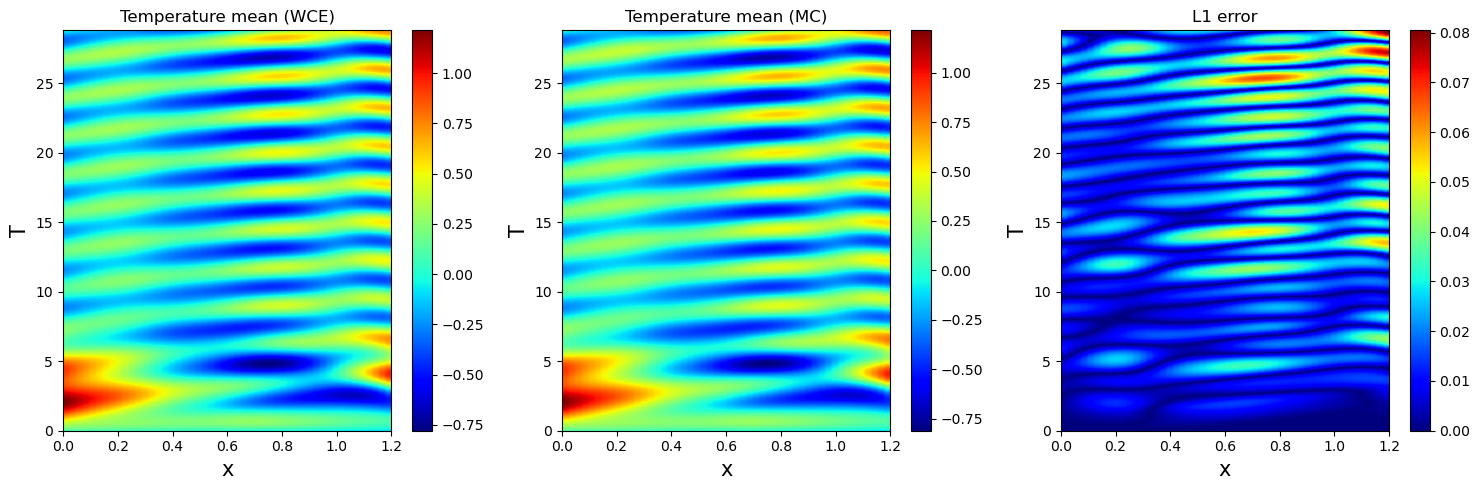

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming xO and t are defined, and T_WCE and T_MC_mean_300 are the 2D data arrays.
# You may need to adjust the indices or slicing based on your actual data shapes.

# Set up a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# First subplot: T mean (WCE)
c1 = ax[0].imshow(T_WCE[0, :, :], aspect='auto', extent=[xO.min(), xO.max(), t.max(), t.min()], cmap='jet')
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('T', fontsize=15)
ax[0].set_title('Temperature mean (WCE)')
ax[0].invert_yaxis()  # Invert y-axis to have time go from bottom to top
fig.colorbar(c1, ax=ax[0], orientation='vertical')

# Second subplot: T mean (MC)
c2 = ax[1].imshow(T_MC_mean_300[:, :], aspect='auto', extent=[xO.min(), xO.max(), t.max(), t.min()], cmap='jet')
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('T', fontsize=15)
ax[1].set_title('Temperature mean (MC)')
ax[1].invert_yaxis()  # Invert y-axis to have time go from bottom to top
fig.colorbar(c2, ax=ax[1], orientation='vertical')

# Third subplot: L1 error
c3 = ax[2].imshow(np.abs(T_WCE[0, :, :] - T_MC_mean_300[:, :]), aspect='auto', extent=[xO.min(), xO.max(), t.max(), t.min()], cmap='jet')
ax[2].set_xlabel('x', fontsize=15)
ax[2].set_ylabel('T', fontsize=15)
ax[2].set_title('L1 error')
ax[2].invert_yaxis()  # Invert y-axis to have time go from bottom to top
fig.colorbar(c3, ax=ax[2], orientation='vertical')

# Adjust layout
plt.tight_layout()
# Save the figure if needed
plt.savefig("Problem3_T_mean_comp.png")

plt.show()


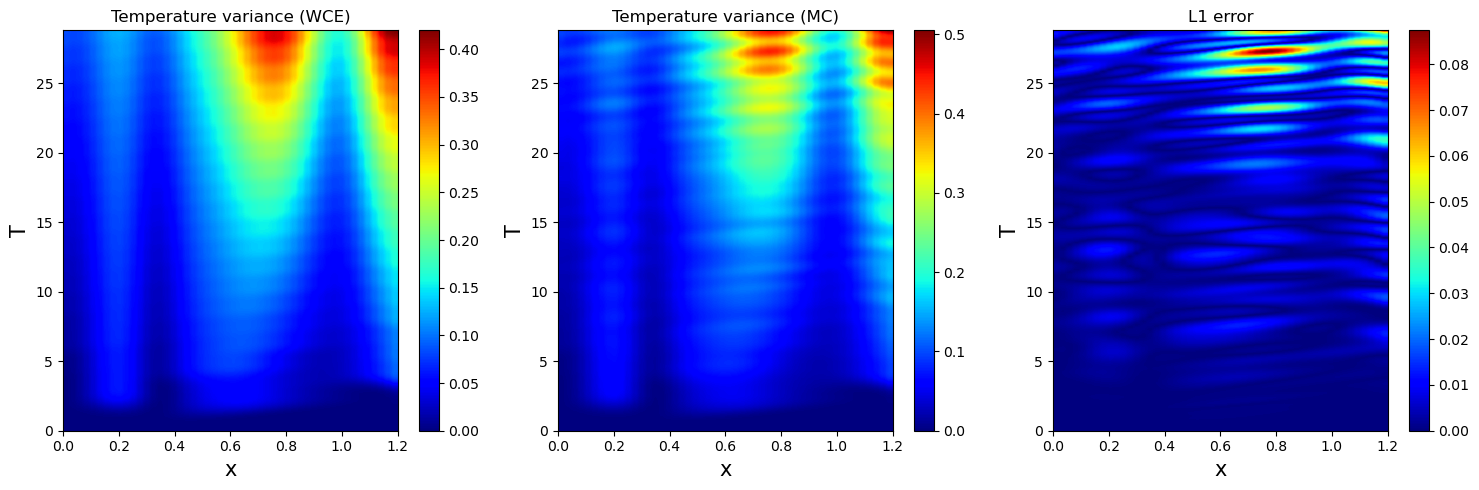

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming xO and t are defined, and T_WCE and T_MC_mean_300 are the 2D data arrays.
# You may need to adjust the indices or slicing based on your actual data shapes.

# Set up a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# First subplot: T mean (WCE)
c1 = ax[0].imshow(T_WCE_var[:, :], aspect='auto', extent=[xO.min(), xO.max(), t.max(), t.min()], cmap='jet')
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('T', fontsize=15)
ax[0].set_title('Temperature variance (WCE)')
ax[0].invert_yaxis()  # Invert y-axis to have time go from bottom to top
fig.colorbar(c1, ax=ax[0], orientation='vertical')

# Second subplot: T mean (MC)
c2 = ax[1].imshow(T_MC_var_300[:, :], aspect='auto', extent=[xO.min(), xO.max(), t.max(), t.min()], cmap='jet')
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('T', fontsize=15)
ax[1].set_title('Temperature variance (MC)')
ax[1].invert_yaxis()  # Invert y-axis to have time go from bottom to top
fig.colorbar(c2, ax=ax[1], orientation='vertical')

# Third subplot: L1 error
c3 = ax[2].imshow(np.abs(T_MC_var_300[:, :] - T_WCE_var[:, :]), aspect='auto', extent=[xO.min(), xO.max(), t.max(), t.min()], cmap='jet')
ax[2].set_xlabel('x', fontsize=15)
ax[2].set_ylabel('T', fontsize=15)
ax[2].set_title('L1 error')
ax[2].invert_yaxis()  # Invert y-axis to have time go from bottom to top
fig.colorbar(c3, ax=ax[2], orientation='vertical')

# Adjust layout
plt.tight_layout()
# Save the figure if needed
plt.savefig("Problem3_T_variance_comp.png")

plt.show()


In [19]:
np.sum(np.abs((T_MC_mean_10[:,:] - T_WCE[0,:,:])))/np.sum(np.abs((T_WCE[0,:,:])))

0.37916950838650376

In [20]:
np.sum(np.abs((T_MC_mean_50[:,:] - T_WCE[0,:,:])))/np.sum(np.abs((T_WCE[0,:,:])))

0.08531330664253925

In [21]:
np.sum(np.abs((T_MC_mean_100[:,:] - T_WCE[0,:,:])))/np.sum(np.abs((T_WCE[0,:,:])))

0.06448716909664653

In [22]:
np.sum(np.abs((T_MC_mean_300[:,:] - T_WCE[0,:,:])))/np.sum(np.abs((T_WCE[0,:,:])))

0.06350426324077037

In [23]:
np.sum(np.abs((T_MC_var_10[:,:] - T_WCE_var[:,:])))/np.sum(np.abs((T_WCE_var[:,:])))

0.4149762323868651

In [24]:
np.sum(np.abs((T_MC_var_50[:,:] - T_WCE_var[:,:])))/np.sum(np.abs((T_WCE_var[:,:])))

0.1240930291796335

In [25]:
np.sum(np.abs((T_MC_var_100[:,:] - T_WCE_var[:,:])))/np.sum(np.abs((T_WCE_var[:,:])))

0.10655372378189204

In [26]:
np.sum(np.abs((T_MC_var_300[:,:] - T_WCE_var[:,:])))/np.sum(np.abs((T_WCE_var[:,:])))

0.06156139576500406